In [1]:
from channels.ina_nygren_sakakibara import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyabc import Distribution, RV
import os, tempfile
import logging
from pyabc.populationstrategy import AdaptivePopulationSize, ConstantPopulationSize
from ionchannelABC import theoretical_population_size
from pyabc import ABCSMC
from pyabc.epsilon import MedianEpsilon
from pyabc.sampler import MulticoreEvalParallelSampler, SingleCoreSampler
from ionchannelABC import IonChannelDistance, EfficientMultivariateNormalTransition, IonChannelAcceptor
from pyabc import History
from ionchannelABC import plot_sim_results
import seaborn as sns
from ionchannelABC import plot_parameters_kde

def simulate_model(**pars):
    """Wrapper function around simulations."""
    data = []
    for sim, time in zip(simulations, times):
        for p, v in pars.items():
            try:
                sim.set_constant(p, v)
            except:
                raise RuntimeWarning('Could not set value of {}'.format(p))
                return None
        sim.reset()
        try:
            data.append(sim.run(time, log=['environment.time','sodium_current.i_Na','sodium_current.m_infinity_cube','sodium_current.h_infinity','membrane.V']))
        except:
            # Failed simulation
            print("Failed Simulation !")
            del(data)
            return None
    return data

def pyabc_simulate(pars):
    res = simulate_model(**pars)
    return res

logging.basicConfig()
abc_logger = logging.getLogger('ABC')
abc_logger.setLevel(logging.DEBUG)
eps_logger = logging.getLogger('Epsilon')
eps_logger.setLevel(logging.DEBUG)
cv_logger = logging.getLogger('CV Estimation')
cv_logger.setLevel(logging.DEBUG)

INFO:myokit:Loading Myokit version 1.28.3


In [3]:
test = simulate_model()

In [23]:
ss = summary_statistics(test)

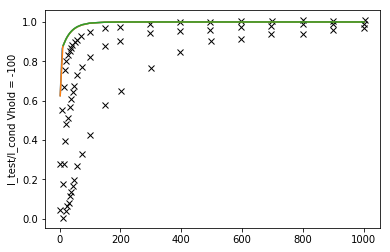

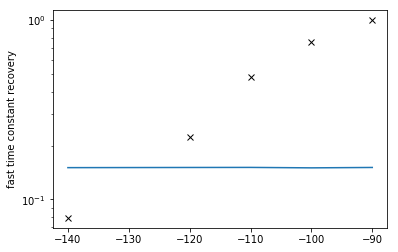

In [24]:
ss_list = (ss.items())
j = 13 # cut between IV curve and Act
k = j +13 # cut between Act and Inact
l = k +11 # cut between Inact and reversal potential
m = l + 4 #cut between reversal potential and tau_f
n = m + 4  # cut between tau_f and tau_s
o = n + 4 # cut between tau_s and the inactivation at Vcond = -100mV
p = o + 12 # cut between the inactivation at Vcond = -100mV and the inactivation at Vcond = -80mV
q = p + 11 #cut between the inactivation at Vcond = -80mV and the recovery at Vhold = -140mV
r = q + 23 #cut between the recovery at Vhold = -140mV and the recovery at Vhold = -120mV
s = r + 23 #cut between the recovery at Vhold = -120mV and the recovery at Vhold = -100mV
t = s + 21 #cut between the recovery at Vhold = -100mV and the recovery time constant


_, y = zip(*ss_list) # unpack a list of pairs into two tuples
"""
y_curr = list(y)[:j]


plt.plot(vsteps, y_curr,
        vsteps, peaks,'kx')
plt.xlabel('mV')
plt.ylabel('normalized peak_curr')
plt.show()

y_act = list(y)[j:k]
plt.plot(vsteps_act, y_act,
        vsteps_act, act,'kx')
plt.xlabel('mV')
plt.ylabel('Activation gate')
plt.show()

y_inact = list(y)[k:l]
plt.plot(vsteps_inact, y_inact,
        vsteps_inact, inact,'kx')
plt.xlabel('mV')
plt.ylabel('inactivation gate')
plt.show()

y_rever = list(y)[l:m]
plt.semilogx(Na_c, y_rever,
        Na_c, rever,'kx')
plt.xlabel('Na_c')
plt.ylabel('mV')
plt.show()


y_tauh1 = list(y)[m:n]

plt.semilogy(vsteps_th1, y_tauh1,
        vsteps_th1, th1,'kx')
plt.ylabel("tau h1 or tau f")
plt.show()

y_tauh2 = list(y)[n:o]
plt.semilogy(vsteps_th2, y_tauh2,
        vsteps_th2, th2,'kx')
plt.ylabel("tau h2 or tau s")
plt.show()

time100, inact100,_ = dataS.Time_course_Inactivation_Sakakibara_all(-100)
time80, inact80,_ = dataS.Time_course_Inactivation_Sakakibara_all(-80)

y_inact100 = list(y)[o:p]
plt.semilogy(time100, y_inact100,
        time100, inact100,'kx')
plt.ylabel("Nomalized peak_curr")
plt.show()

y_inact80 = list(y)[p:q]
plt.semilogy(time80, y_inact80,
        time80, inact80,'kx')
plt.ylabel("Nomalized peak_curr")
plt.show()
"""
timeR140,recov140,_  = dataS.Recovery_Sakakibara_all(-140)
timeR120,recov120,_  = dataS.Recovery_Sakakibara_all(-120)
timeR100,recov100,_  = dataS.Recovery_Sakakibara_all(-100)

y_recov140 = list(y)[q:r]
plt.plot(timeR140, y_recov140,
        timeR140, recov140,'kx')
plt.ylabel("I_test/I_cond Vhold = -140")
#plt.show()

y_recov120 = list(y)[r:s]
plt.plot(timeR120, y_recov120,
        timeR120, recov120,'kx')
plt.ylabel("I_test/I_cond Vhold = -120")
#plt.show()

y_recov100 = list(y)[s:t]
plt.plot(timeR100, y_recov100,
        timeR100, recov100,'kx')
plt.ylabel("I_test/I_cond Vhold = -100")
plt.show()



y_rec = list(y)[t:]
plt.semilogy(vsteps_th_depol, y_rec,
        vsteps_th_depol, th_depol,'kx')
plt.ylabel("fast time constant recovery")
plt.show()


In [21]:
y_rec

[0.036356177796703824,
 0.07060500080117038,
 0.12217005935188975,
 0.1260202314100959,
 0.14264797746984015]